Find the most highly categorised data in the dataset

In [1]:
from scipy.io import loadmat
import numpy as np
import pathlib

In [2]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [3]:
from pathlib import Path
# Load the softmax encodings of the data

from sisap2023.utils.mirflickr import load_encodings

smData = load_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

In [5]:
from sisap2023.utils.count_cats import find_cats_with_count_more_than_less_than, count_number_in_cat_gt_thresh

threshold = 0.90

range_catsx,counts = find_cats_with_count_more_than_less_than(100,184,smData,threshold)

print( f"found {range_catsx.size} results")
for i in range(range_catsx.size):
    print( range_catsx[i], counts[i], categories[range_catsx[i]], count_number_in_cat_gt_thresh(range_catsx[i],threshold,smData) )

found 100 results
9 124 ostrich 124
12 143 house finch 143
15 110 robin 110
31 106 tree frog 106
131 109 little blue heron 109
145 125 king penguin 125
146 147 albatross 147
148 121 killer whale 121
150 122 sea lion 122
151 134 Chihuahua 134
207 124 golden retriever 124
292 144 tiger 144
310 132 ant 132
315 142 mantis 142
320 120 damselfly 120
324 144 cabbage butterfly 144
327 102 starfish 102
348 133 ram 133
354 136 Arabian camel 136
366 136 gorilla 136
401 137 accordion 137
402 154 acoustic guitar 154
406 122 altar 122
424 135 barbershop 135
433 101 bathing cap 101
441 157 beer glass 157
442 111 bell cote 111
447 105 binoculars 105
448 109 birdhouse 109
452 165 bonnet 165
455 165 bottlecap 165
457 120 bow tie 120
460 132 breakwater 132
466 114 bullet train 114
475 174 car mirror 174
476 159 carousel 159
488 119 chain 119
510 103 container ship 103
515 113 cowboy hat 113
536 183 dock 183
546 138 electric guitar 138
555 150 fire engine 150
568 159 fur coat 159
603 162 horse cart 162
60

In [6]:
from sisap2023.utils.count_cats import get_topcat

q0 = 924258

tc = get_topcat(q0,smData)
print( tc, categories[tc] )

207 golden retriever


In [7]:
from sisap2023.metrics.euc import euc

def getDists(query_index,allData):
    '''Return the distances from the query to allData'''
    '''Returns an array same dimension as allData of scalars'''
    mf_query_data = allData[query_index]
    distances = euc(mf_query_data, allData)
    return distances

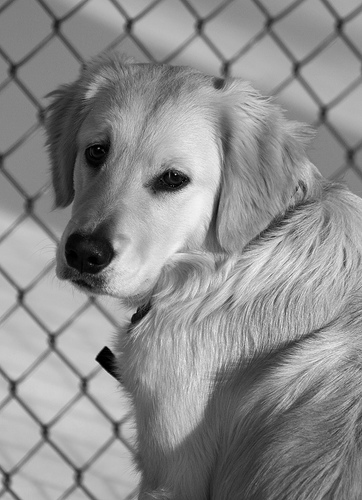

In [8]:
from sisap2023.utils.mirflickr import get_mf_image

get_mf_image(q0)

In [9]:
dists = getDists(q0,allData)
closest_indices = np.argsort(dists) # the closest images to the query

best_100_for_one = closest_indices[0:100]

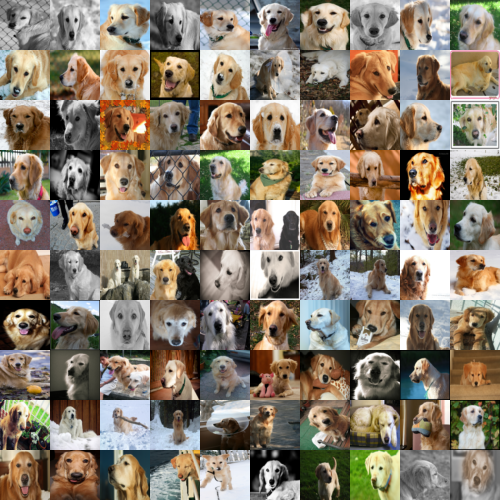

In [10]:
from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_100_for_one,10,10,50,50)

In [11]:
count = 0
tot_cats = 0
for i in range(100):
    cc = get_topcat(best_100_for_one[i],smData)
    if tc == cc:
        count += 1
    tot_cats += smData[best_100_for_one[i],tc]

    print( categories[cc] )

print(count ,tot_cats )

golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
Labrador retriever
kuvasz
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
Labrador retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
dingo
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
Great Pyrenees
golden retriever
golden retriever
golden retriever
golden retriever
flat-coated retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retriever
Great Pyrenees
golden retriever
Labrador retriever
golden retriever
golden retriever
golden retriever
golden retriever
golden retr

In [12]:
from sisap2023.utils.count_cats import count_images_in_category


vals,counts =count_images_in_category(smData)


In [13]:
print( categories[vals[1]], vals[1], counts[1] )

goldfish 1 1037
